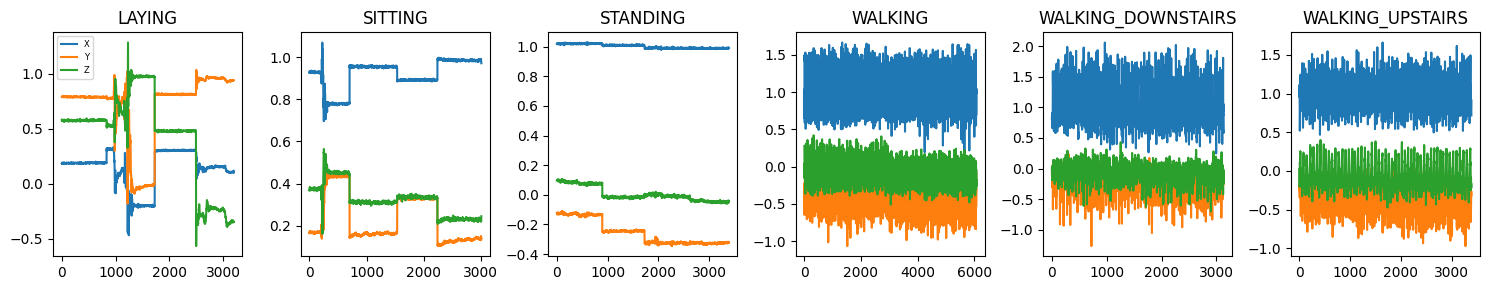

In [ ]:
#Task 1 : Exploratory Data Analysis (EDA) [3 marks]

'''

Quetsion 1

Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between
 the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model
   will be able to classify the activities based on the data? [0.5 marks]'''

import os
import pandas as pd
import matplotlib.pyplot as plt

combined_folder = r'D:\Mtech_Sem1\ML\Combined\Train' 

activities = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]

plt.figure(figsize=(15, 3))

for i, activity in enumerate(activities):
    activity_path = os.path.join(combined_folder, activity)
    
    df = pd.read_csv(os.path.join(activity_path, r"Subject_1.csv"))
    
    data = df[['accx', 'accy', 'accz']]  
    
    plt.subplot(1, len(activities), i + 1)
    plt.plot(data['accx'], label='X')
    plt.plot(data['accy'], label='Y')
    plt.plot(data['accz'], label='Z')
    plt.title(activity)
   
    if i == 0:
        plt.legend(fontsize=6)

plt.tight_layout()
plt.show()

#print(activity)


C:\Users\sarth\AppData\Local\Temp\ipykernel_24732\2653462437.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(activities))


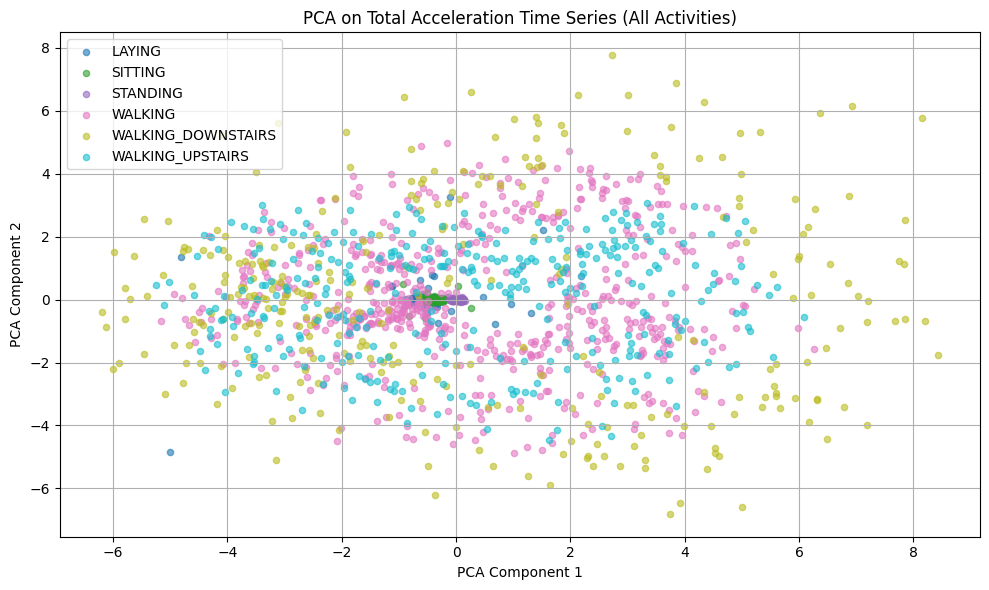

In [ ]:
'''Quetion 3
Task 1 
Visualize the data using PCA. [1 marks]
Use PCA (Principal Component Analysis) on Total Acceleration 

 to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.'''

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt

# Folder where your subject CSVs are stored
combined_folder = r'D:\Mtech_Sem1\ML\Combined\Train'
activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

window_size = 10  # ~4 seconds at 50Hz
all_segments = []
all_labels = []

for activity in activities:
    df = pd.read_csv(os.path.join(combined_folder, activity, "Subject_1.csv"))
    
    # Compute total acceleration magnitude
    df['total_acc'] = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)

    # Segment the total_acc into fixed-size windows
    for start in range(0, len(df) - window_size + 1, window_size):
        segment = df['total_acc'].values[start:start + window_size]
        all_segments.append(segment)
        all_labels.append(activity)

# Convert to NumPy arrays
segments = np.array(all_segments)
labels = np.array(all_labels)

# Normalize features
scaler = StandardScaler()
segments_scaled = scaler.fit_transform(segments)

# PCA: reduce 200-D time series to 2-D
pca = PCA(n_components=2)
segments_pca = pca.fit_transform(segments_scaled)

# Plot all activity segments in one scatter plot
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(activities))

for i, activity in enumerate(activities):
    idx = labels == activity
    plt.scatter(segments_pca[idx, 0], segments_pca[idx, 1], label=activity, alpha=0.6, s=20, color=colors(i))

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA on Total Acceleration Time Series (All Activities)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sarth\AppData\Local\Temp\ipykernel_24732\1495499619.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


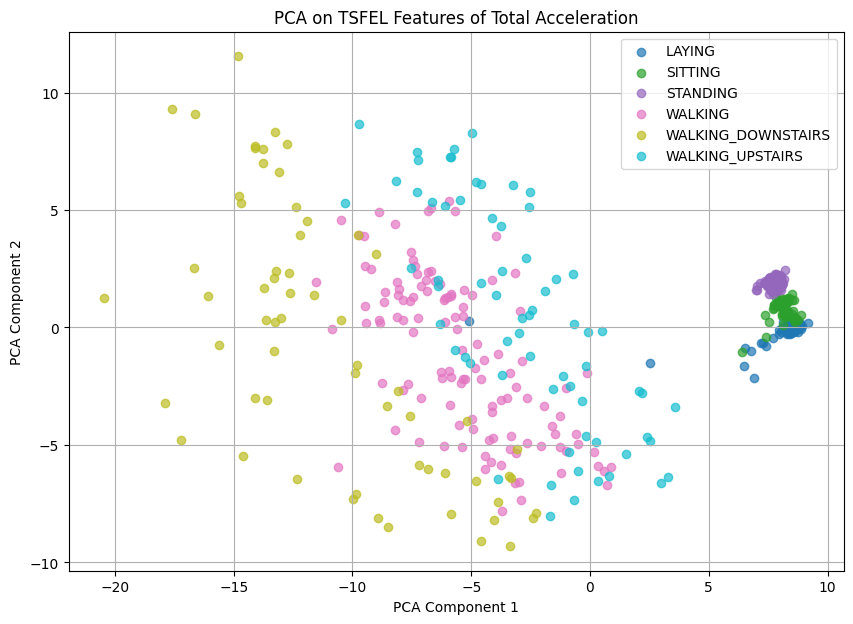

In [ ]:

'''
Question 3 
Task 2
Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then 
perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
'''
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tsfel  # make sure it's installed: pip install tsfel

# Settings
combined_folder = r'D:\Mtech_Sem1\ML\Combined\Train' 
activities = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
window_size = 50  # ~4 seconds at 50Hz

# Load TSFEL feature configuration (default features)
cfg = tsfel.get_features_by_domain()

all_features = []
all_labels = []

for activity in activities:
    filepath = os.path.join(combined_folder, activity, "Subject_1.csv")
    df = pd.read_csv(filepath)
    
    # Compute total acceleration magnitude
    df['total_acc'] = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)

    # Segment into windows
    for start in range(0, len(df) - window_size + 1, window_size):
        segment = df['total_acc'].values[start:start+window_size]

        # Extract features using TSFEL (segment must be 1D array)
        features = tsfel.time_series_features_extractor(cfg, segment, fs=50)
        all_features.append(features.values.flatten())
        all_labels.append(activity)

# Convert features and labels to arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(all_features)

# PCA to 2 components
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot
plt.figure(figsize=(10,7))
unique_labels = np.unique(all_labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    idx = all_labels == label
    plt.scatter(features_pca[idx, 0], features_pca[idx, 1], label=label, alpha=0.7, color=colors(i))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on TSFEL Features of Total Acceleration')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\sarth\AppData\Local\Temp\ipykernel_24732\4041132217.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(X_path, delim_whitespace=True, header=None)
C:\Users\sarth\AppData\Local\Temp\ipykernel_24732\4041132217.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  label_map = pd.read_csv(labels_path, delim_whitespace=True, header=None, index_col=0)[1].to_dict()
C:\Users\sarth\AppData\Local\Temp\ipykernel_24732\4041132217.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


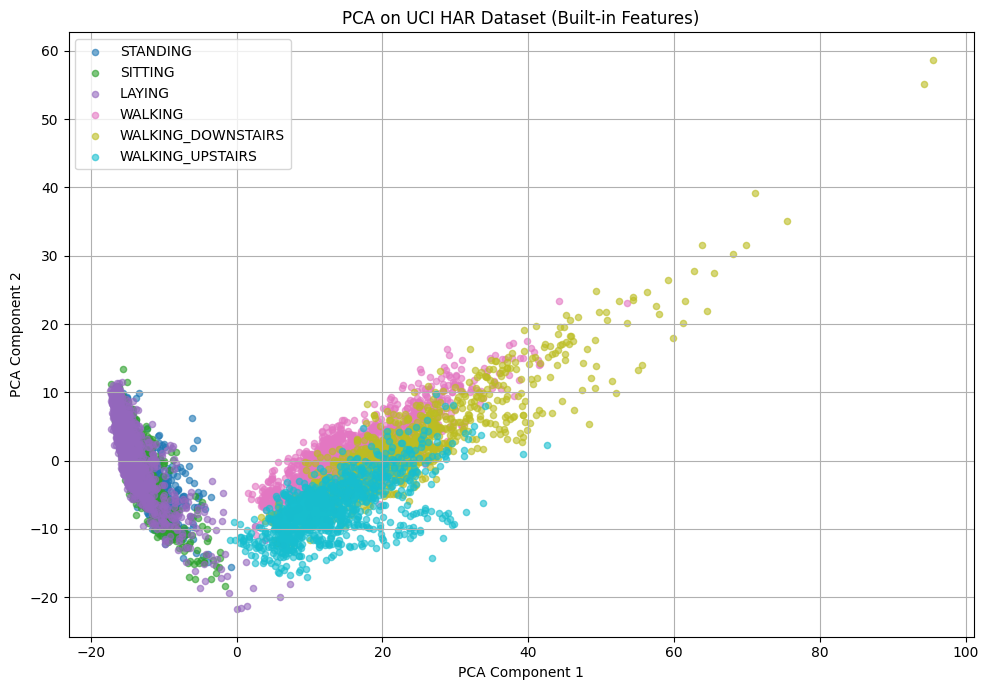

In [ ]:
'''

Question 3 
Task 3
Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Paths to your data files 
data_folder = r"D:\Mtech_Sem1\ML\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train"
X_path = os.path.join(data_folder, "X_train.txt")
y_path = os.path.join(data_folder, "y_train.txt")
labels_path = r"D:\Mtech_Sem1\ML\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\activity_labels.txt"

# Load data
X = pd.read_csv(X_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_path, header=None)[0]
label_map = pd.read_csv(labels_path, delim_whitespace=True, header=None, index_col=0)[1].to_dict()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Map numeric labels to activity names
y_labels = y.map(label_map)

# Plot
plt.figure(figsize=(10, 7))
unique_labels = y_labels.unique()
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    idx = y_labels == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label, alpha=0.6, s=20, color=colors(i))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on UCI HAR Dataset (Built-in Features)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sarth\AppData\Local\Temp\ipykernel_24732\1827349870.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  uci_df = pd.read_csv(X_path, delim_whitespace=True, header=None)
C:\Users\sarth\AppData\Local\Temp\ipykernel_24732\1827349870.py:57: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  feature_names = pd.read_csv(features_path, delim_whitespace=True, header=None, index_col=0)[1].values



🔍 TSFEL: Found 262 highly correlated feature pairs.
Examples: [('0_Spectrogram mean coefficient_24.19Hz', '0_Spectrogram mean coefficient_23.39Hz'), ('0_Wavelet variance_2.08Hz', '0_Wavelet variance_1.79Hz'), ('0_Wavelet variance_1.56Hz', '0_Wavelet energy_1.56Hz'), ('0_Spectral roll-off', '0_Spectral spread'), ('0_Wavelet standard deviation_6.25Hz', '0_Wavelet variance_6.25Hz')]

🔍 UCI HAR: Found 16116 highly correlated feature pairs.
Examples: [('fBodyBodyGyroMag-mad()', 'fBodyBodyGyroMag-sma()'), ('tBodyGyroJerkMag-mad()', 'tBodyGyroJerk-std()-X'), ('fBodyAccJerk-mad()-X', 'tBodyAcc-min()-Y'), ('tBodyAcc-entropy()-Y', 'tBodyAccJerk-entropy()-Y'), ('fBodyAcc-sma()', 'tBodyAcc-std()-X')]


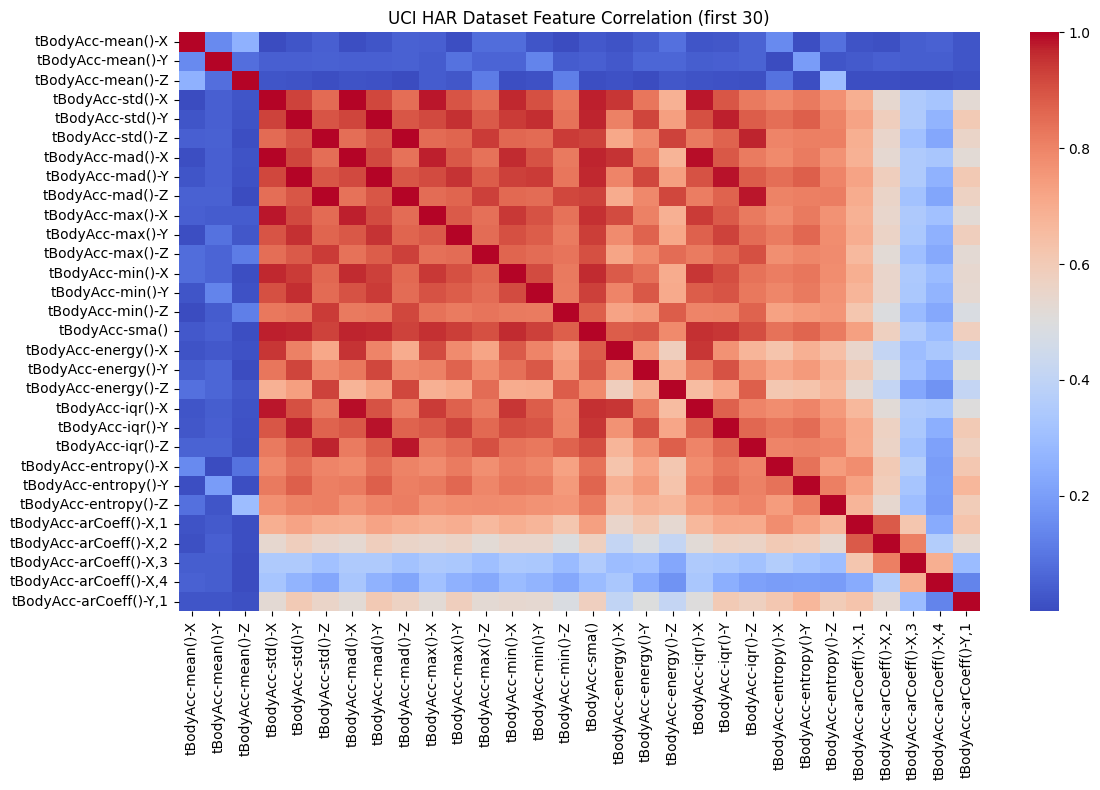

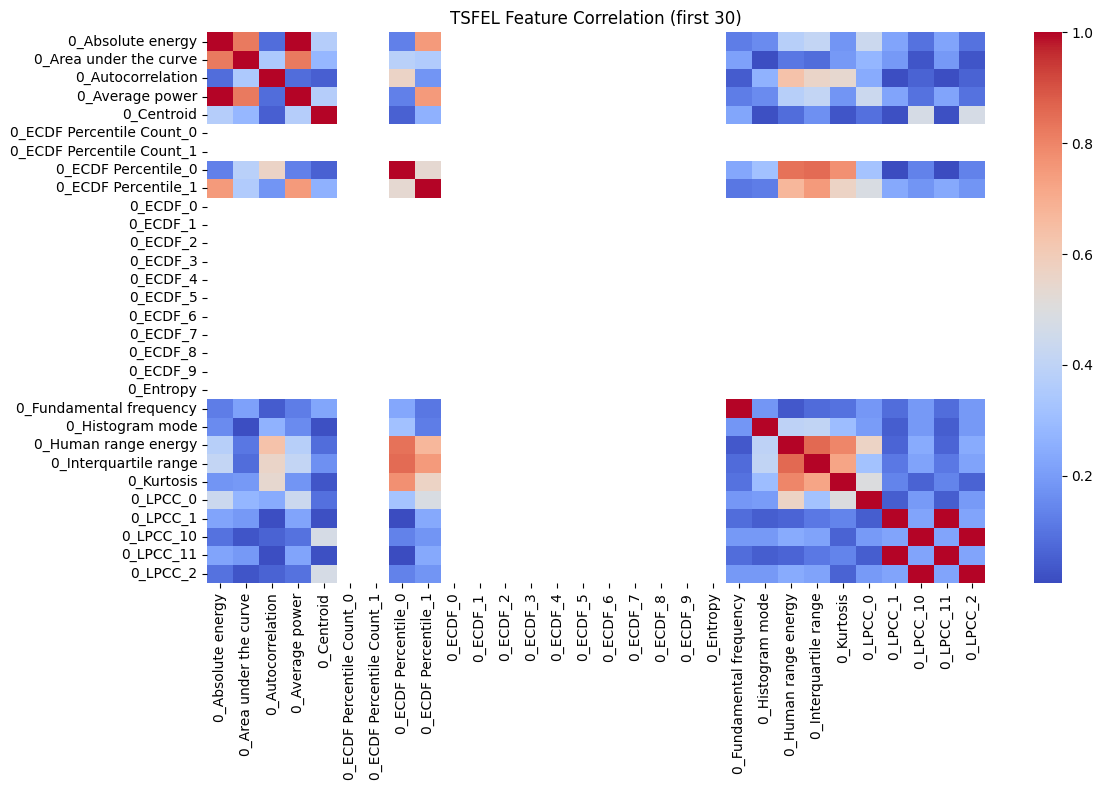

In [ ]:
#question 4

'''
Question 4
Calculate the correlation matrix of the features obtained by 
TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. 
Are there any redundant features?

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tsfel
from sklearn.preprocessing import StandardScaler
import os

# -------- TSFEL Feature Correlation Analysis -------- #

# Load and preprocess one subject's data (for example)
df = pd.read_csv(r"D:\Mtech_Sem1\ML\Combined\Train\WALKING\Subject_1.csv")
df['total_acc'] = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)

# Segment total acceleration (single segment for demo)
window_size = 200
segments = []
for start in range(0, len(df) - window_size + 1, window_size):
    segment = df['total_acc'].values[start:start + window_size]
    segments.append(segment)
segments = np.array(segments)

# Load TSFEL config
cfg = tsfel.get_features_by_domain()

# Extract TSFEL features
tsfel_features = []
for segment in segments:
    seg_df = pd.DataFrame(segment)
    features = tsfel.time_series_features_extractor(cfg, seg_df, fs=50, verbose=0)
    tsfel_features.append(features.values.flatten())
tsfel_df = pd.DataFrame(tsfel_features, columns=features.columns)

# Drop NaNs or infinite values
tsfel_df = tsfel_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# Compute correlation matrix
corr_matrix_tsfel = tsfel_df.corr().abs()

# Find highly correlated pairs
high_corr_pairs_tsfel = np.where((corr_matrix_tsfel > 0.9) & (corr_matrix_tsfel < 1.0))
highly_corr_features_tsfel = set()
for i, j in zip(*high_corr_pairs_tsfel):
    highly_corr_features_tsfel.add((corr_matrix_tsfel.columns[i], corr_matrix_tsfel.columns[j]))

# -------- UCI Dataset Feature Correlation Analysis -------- #

# Load UCI dataset features (X_train)
X_path = r"D:\Mtech_Sem1\ML\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
uci_df = pd.read_csv(X_path, delim_whitespace=True, header=None)

# Optional: Load feature names

features_path = r"D:\Mtech_Sem1\ML\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\features.txt"
feature_names = pd.read_csv(features_path, delim_whitespace=True, header=None, index_col=0)[1].values
uci_df.columns = feature_names

# Compute correlation matrix
corr_matrix_uci = uci_df.corr().abs()

# Find highly correlated pairs
high_corr_pairs_uci = np.where((corr_matrix_uci > 0.9) & (corr_matrix_uci < 1.0))
highly_corr_features_uci = set()
for i, j in zip(*high_corr_pairs_uci):
    highly_corr_features_uci.add((corr_matrix_uci.columns[i], corr_matrix_uci.columns[j]))

# -------- Summary Output -------- #

print(f"\n🔍 TSFEL: Found {len(highly_corr_features_tsfel)} highly correlated feature pairs.")
print("Examples:", list(highly_corr_features_tsfel)[:5])

print(f"\n🔍 UCI HAR: Found {len(highly_corr_features_uci)} highly correlated feature pairs.")
print("Examples:", list(highly_corr_features_uci)[:5])

# Optional: Plot heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_uci.iloc[:30, :30], cmap='coolwarm')
plt.title("UCI HAR Dataset Feature Correlation (first 30)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_tsfel.iloc[:30, :30], cmap='coolwarm')
plt.title("TSFEL Feature Correlation (first 30)")
plt.tight_layout()
plt.show()


In [ ]:
'''
Task 2 : Decision Trees for Human Activity Recognition [3 marks]


'''

'''
Question 1 
Task 1
Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.
'''

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")# 1-dim data
y_test = np.load("y_test.npy")

flat_X_train = X_train.reshape(X_train.shape[0], -1)# same number of rows but flattens the remaining dimensions into a single column.
flat_X_test = X_test.reshape(X_test.shape[0], -1)#Decision Tree classifier expects a 2D input where each row is a sample and each column is a feature.
#-1 automatically calculates the number of features by flattening the remaining dimensions.


decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(flat_X_train, y_train)


y_prediction = decision_tree.predict(flat_X_test)

accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
cm = confusion_matrix(y_test, y_prediction)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\sarth\AppData\Local\Temp\ipykernel_5440\3721409061.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x = pd.read_csv(f"{UCI_PATH}/{split}/Inertial Signals/total_acc_x_{split}.txt", delim_whitespace=True, header=None)
C:\Users\sarth\AppData\Local\Temp\ipykernel_5440\3721409061.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(f"{UCI_PATH}/{split}/Inertial Signals/total_acc_y_{split}.txt", delim_whitespace=True, header=None)
C:\Users\sarth\AppData\Local\Temp\ipykernel_5440\3721409061.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  z = pd.read_csv(f"{UCI_PATH}/{split}/Inertial Signals/total_acc_z_{split}.txt", delim_whitespace=True, header=None)
C:\Users\sarth\AppD

Extracting features from UCI data...
Evaluating on test set...
Test Accuracy: 0.975
Loading your multi-class data...
Extracting features from your data...
Predicting on your data...
True labels: ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING', 'WALKING']
Predicted labels: ['LAYING', 'WALKING', 'LAYING', 'WALKING', 'WALKING', 'WALKING']
Accuracy on your data: 0.6666666666666666


In [ ]:
'''Question 1
Task 2

Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.'''

import numpy as np
import pandas as pd
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import MakeDataset
import matplotlib.pyplot as plt
from sklearn import tree
import warnings


X_train, y_train = MakeDataset.X_train, MakeDataset.y_train
X_test, y_test   = MakeDataset.X_test, MakeDataset.y_test

cfg = tsfel.get_features_by_domain() #loads prexisiting set of time-series features categorized by domain

def extract_features(X):
    feature_dfs = []
    # sampling frequency of 50 Hz for the UCI HAR Dataset
    sampling_frequency = 50
    for i in range(X.shape[0]):
        df = pd.DataFrame(X[i], columns=['accx','accy','accz'])

        # Using catch_warnings to suppress the specific TSFEL UserWarning
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", UserWarning) # Ignore UserWarnings within this block
            # Pass the sampling frequency to the extractor
            f_x = tsfel.time_series_features_extractor(cfg, df['accx'], sf=sampling_frequency, verbose=0)
            f_y = tsfel.time_series_features_extractor(cfg, df['accy'], sf=sampling_frequency, verbose=0)
            f_z = tsfel.time_series_features_extractor(cfg, df['accz'], sf=sampling_frequency, verbose=0)


        features_squeeze = pd.concat([f_x, f_y, f_z], axis=1)
        feature_dfs.append(features_squeeze)

    return pd.concat(feature_dfs, axis=0).reset_index(drop=True)

feat_X_train = extract_features(X_train)
feat_X_test = extract_features(X_test)

print("Feature dataset shapes:")
print("X_train_feat:", feat_X_train.shape)
print("X_test_feat:", feat_X_test.shape)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(feat_X_train, y_train)


y_pred = clf.predict(feat_X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("\nResults")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
'''
Question 1
Task 3
Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.
'''

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

train_path = "./UCI HAR Dataset/train/"
test_path = "./UCI HAR Dataset/test/"


X_train = pd.read_csv(train_path + "X_train.txt", sep=r'\s+', header=None)
X_test  = pd.read_csv(test_path  + "X_test.txt", sep=r'\s+', header=None)


y_train = pd.read_csv(train_path + "y_train.txt", sep=r'\s+', header=None).iloc[:, 0].values# iloc is used cuz decision tree classifier reads target variable in  1-dim data so we need to squeeze features in 1-dimm
y_test  = pd.read_csv(test_path  + "y_test.txt", sep=r'\s+', header=None).iloc[:, 0].values

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


y_predicted = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='weighted')#calculate a single, overall precision or recall score by taking the average of the per-class scores, weighted by the number of true instances for each class.
recall = recall_score(y_test, y_predicted, average='weighted')# can have biasness for imbanalced dataset due to more sample size for a particullar class
cm = confusion_matrix(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_predicted))

Comparing Results :-

In the models trained above , the highest accuracy was given by  tsfel which was 88.88%.
Raw accelerometer gave the lowest accuracy due to high dimensionality and noise
UCL data features gave prominent results which were upto standards of TSFEL. But,TSFEL had the edge because it's extraction features were good 

In [ ]:

'''
Question 1
Task 4
Compare the results of the three models. Which model do you think is better?
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import MakeDataset  # uses your MakeDataset.py
import warnings 
import tsfel

X_train_raw = MakeDataset.X_train.reshape(MakeDataset.X_train.shape[0], -1)
X_test_raw  = MakeDataset.X_test.reshape(MakeDataset.X_test.shape[0], -1)
y_train_raw = MakeDataset.y_train
y_test_raw  = MakeDataset.y_test


cfg = tsfel.get_features_by_domain()

def extract_features(X):
    feature_dfs = []
    sampling_frequency=50
    for i in range(X.shape[0]):
        df = pd.DataFrame(X[i], columns=['accx','accy','accz'])
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", UserWarning) # Ignore UserWarnings within this block
            # Pass the sampling frequency to the extractor
            f_x = tsfel.time_series_features_extractor(cfg, df['accx'], sf=sampling_frequency, verbose=0)
            f_y = tsfel.time_series_features_extractor(cfg, df['accy'], sf=sampling_frequency, verbose=0)
            f_z = tsfel.time_series_features_extractor(cfg, df['accz'], sf=sampling_frequency, verbose=0)
        features = pd.concat([f_x, f_y, f_z], axis=1)
        feature_dfs.append(features)
    return pd.concat(feature_dfs, axis=0).reset_index(drop=True)

X_train_tsfel = extract_features(MakeDataset.X_train)
X_test_tsfel  = extract_features(MakeDataset.X_test)
y_train_tsfel = y_train_raw
y_test_tsfel  = y_test_raw

train_path = "./UCI HAR Dataset/train/"
test_path  = "./UCI HAR Dataset/test/"

X_train_ucl = pd.read_csv(train_path + "X_train.txt", delim_whitespace=True, header=None)
X_test_ucl  = pd.read_csv(test_path  + "X_test.txt",  delim_whitespace=True, header=None)
y_train_ = pd.read_csv(train_path + "y_train.txt", delim_whitespace=True, header=None).values.ravel()
y_test_uci  = pd.read_csv(test_path  + "y_test.txt",  delim_whitespace=True, header=None).values.ravel()

def test_depths(X_train, y_train, X_test, y_test, label):
    depths = range(2, 9)
    accuracies = []
    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
      #  print(f"{label} | Depth={d} | Accuracy={acc:.4f}")
    return list(depths), accuracies

depths_raw, acc_raw = test_depths(X_train_raw, y_train_raw, X_test_raw, y_test_raw, "Raw (flattened)")
depths_tsfel, acc_tsfel = test_depths(X_train_tsfel, y_train_tsfel, X_test_tsfel, y_test_tsfel, "TSFEL Features")
depths_uci, acc_uci = test_depths(X_train_uci, y_train_uci, X_test_uci, y_test_uci, "UCI Provided Features")


plt.figure(figsize=(8,6))
plt.plot(depths_raw, acc_raw, marker='o', label="Raw (flattened)")
plt.plot(depths_tsfel, acc_tsfel, marker='s', label="TSFEL features")
plt.plot(depths_uci, acc_uci, marker='^', label="UCI provided features")

plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.legend()
plt.grid(True)
plt.show()


'''
Question 3
Task 4
Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? [0.5 mark]
'''
 Ans :- The model performs badly on Walking, Walking Upstairs, and Walking Downstairs, which are frequently misclassified with each other. This is because their accelerometer patterns are very similar and only small deference in step angle, intensity.
It also occasionally confuses Sitting vs Standing, as both are static activities with similar signals dominated by gravity, making them hard to separate.
Additionally, variations in how different participants perform the same activity contribute to errors.
So yes, certain participants and activities show poorer performance due to overlapping signal patterns and variability.
Class sitting is sometimes confused with class Laying  and Walking.
Class Walking and Walking Upstairs are sometimes confused with each other. 
Class Walking Downstairs appears to be perfectly classified with no misclassifications in this test set can be seen in confusion matrix